In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%store -r data_frame_2
df = data_frame_2

In [3]:
subjs = df['uniqueid'].unique()

In [4]:
x = df[(df['left_comp_type'] == 4) & (df['right_comp_type'] == 40)]
y = df[(df['left_comp_type'] == 40) & (df['right_comp_type'] == 4)]
temp = pd.concat([x, y])
correct = temp[temp['correct_side'] == temp['chosen_side']]

In [5]:
data = []
for i in subjs:
    data.append(len(correct[correct['uniqueid'] == i])/2)
#data

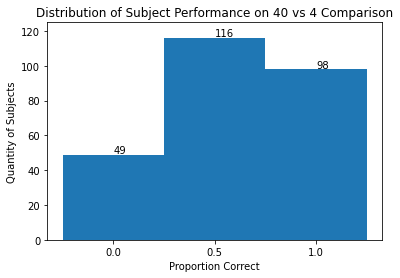

In [6]:
fig = plt.figure(); ax = plt.subplot(111)
arr = plt.hist(data, bins=[-0.25,0.25,0.75,1.25])
plt.xticks([0, 0.5, 1])
plt.ylim(0, 125)
for i in range(3):
    plt.text(i*0.5,arr[0][i]+0.8, str(int(arr[0][i])))
plt.title('Distribution of Subject Performance on 40 vs 4 Comparison')
plt.xlabel('Proportion Correct')
plt.ylabel('Quantity of Subjects')
plt.savefig('40_vs_4_distribution.pdf', format='pdf', dpi=1200)

In [7]:
fours = df[(df['left_comp_type'] == 4) | (df['right_comp_type'] == 4)]
fours_corr = fours[fours['correct_side'] == fours['chosen_side']]

In [8]:
fours_data = []
for i in subjs:
    fours_data.append(len(fours_corr[fours_corr['uniqueid'] == i])/18)

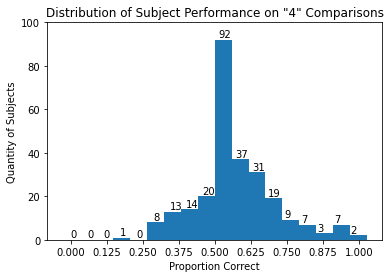

In [9]:
fig = plt.figure(); ax = plt.subplot(111)
arr = plt.hist(fours_data,bins=np.linspace(-(1/36), 1 + (1/36), 19))
plt.xticks(np.linspace(0, 1, 9))
plt.ylim(0, 100)
for i in range(18):
    plt.text(i*(1/17.5),arr[0][i]+1.2, str(int(arr[0][i])))
plt.title('Distribution of Subject Performance on "4" Comparisons')
plt.xlabel('Proportion Correct')
plt.ylabel('Quantity of Subjects')
plt.savefig('all_4s_distribution.pdf', format='pdf', dpi=1200)